In [4]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’




In [2]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
Tel_GABA <- readRDS('/data/work/5month_Tel/10_budgerigar_Tel_GABA.rds')
Tel_GABA

An object of class Seurat 
18448 features across 56454 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
Tel_GABA

An object of class Seurat 
18448 features across 56454 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
Idents(Tel_GABA) <- Tel_GABA$`Sample_ID`

In [7]:
# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(Tel_GABA, split.by = "Sample_ID")

# NormalizeData and FindVariableFeatures
for (name in names(budgerigar_brain_obj_list)) {
    
    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”
Warning message:
“The following arguments are not used: nselect”


In [8]:
integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


In [9]:
####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca")
Tel_GABA <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 807 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1317 anchors

Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Projecting new data onto SVD

Projecting new dat

In [10]:
# Scale data (default: only for variable features)
variable_feature <- rownames(Tel_GABA)

In [11]:
Tel_GABA <- ScaleData(Tel_GABA, features = variable_feature, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA

Centering and scaling data matrix



In [12]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(Tel_GABA) <- "integrated"

# PCA

Tel_GABA <- RunPCA(Tel_GABA, assay = "integrated", verbose = T) 

PC_ 1 
Positive:  ANO3, PDE10A, PDE7B, ADCY5, EPB41L4B, SLC4A4, PCP4, CELF2, ZFHX4, MEIS2 
	   CDKL5, AK5, CRACD, RASGRP1, KLHL2, TPD52L1, PHACTR1, ENOX1, CNKSR2, MMEL1 
	   FILIP1L, GABRB3, KCNT2, ITPR1, RGS12, CLMN, DGKI, MEIS1, MID1, GULP1 
Negative:  KIAA1217, PIEZO2, ADCYAP1R1, PTCHD4, LUZP2, ZEB2, TCF12, GABBR2, GRIP1, VIPR2 
	   NXPH1, SOX6, VSTM2A, PDE3B, ZNF385D, PTPRM, NPAS3, OXR1, BRINP3, CHL1 
	   OPRM1, ADCY8, GABRA1, SST, KCNC2, RGS7, ETV1, VWC2, KCNC1, GRIA4 
PC_ 2 
Positive:  DSCAM, SLIT2, ADARB2, C8orf34, NTNG1, NFIA, CADPS2, FOXP2, SULF2, ANO1 
	   SPHKAP, CACNA1B, NETO1, SLC4A7, CNR1, KCNB2, NR2F2, RASAL2, GRID2, DOK7 
	   MDGA1, DPF3, PCDH15, CDH2, GRM7, SEMA5B, NRP1, TAFA5, CDK14, PRKG1 
Negative:  PIEZO2, RYR2, DGKI, RYR3, LUZP2, KIAA1217, LRP1B, NXPH1, ITPR1, SST 
	   ENOX1, MCTP1, ADCY5, LMO7, SIPA1L2, SLC24A2, OTOF, LAMB1, FAM135B, BRCA2 
	   VIPR2, ANO4, XKR4, PDE10A, ERBB4, SLC2A13, PCP4, AK5, PTPRM, AKAIN1 
PC_ 3 
Positive:  CRTAC1, CCDC60, HPSE2, ANO1, NFIA

In [13]:
Tel_GABA <- FindNeighbors(Tel_GABA, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:06:08 UMAP embedding parameters a = 0.9922 b = 1.112

19:06:08 Read 56454 rows and found 40 numeric columns

19:06:08 Using Annoy for neighbor search, n_neighbors = 30

19:06:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:06:16 Writing NN index file to temp file /tmp/RtmpMmGJm8/file72e365bd0e0

19:06:16 Searching Annoy index using 1 thread, search_k 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9332
Number of communities: 21
Elapsed time: 29 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9008
Number of communities: 26
Elapsed time: 31 seconds


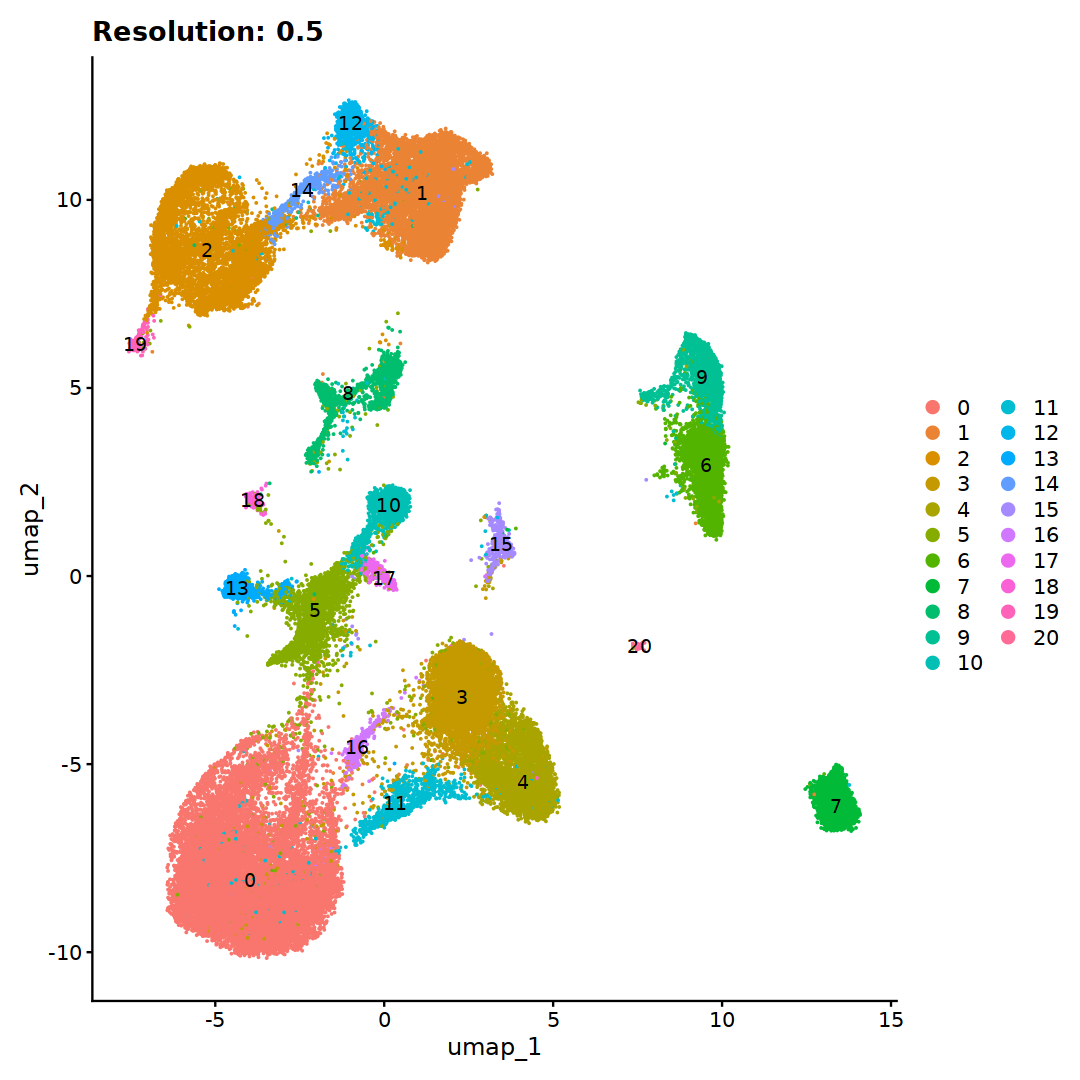

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8772
Number of communities: 36
Elapsed time: 29 seconds


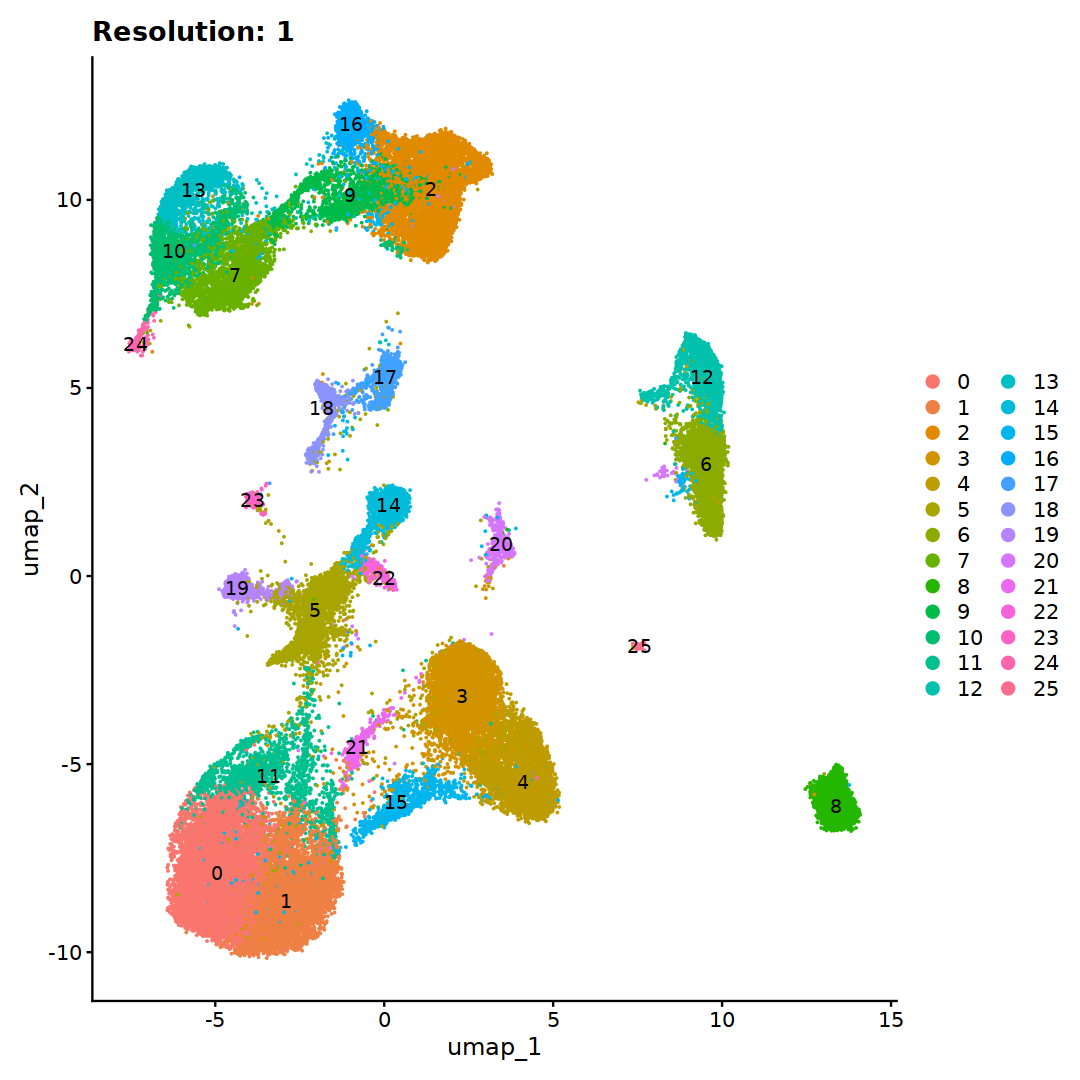

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 41
Elapsed time: 28 seconds


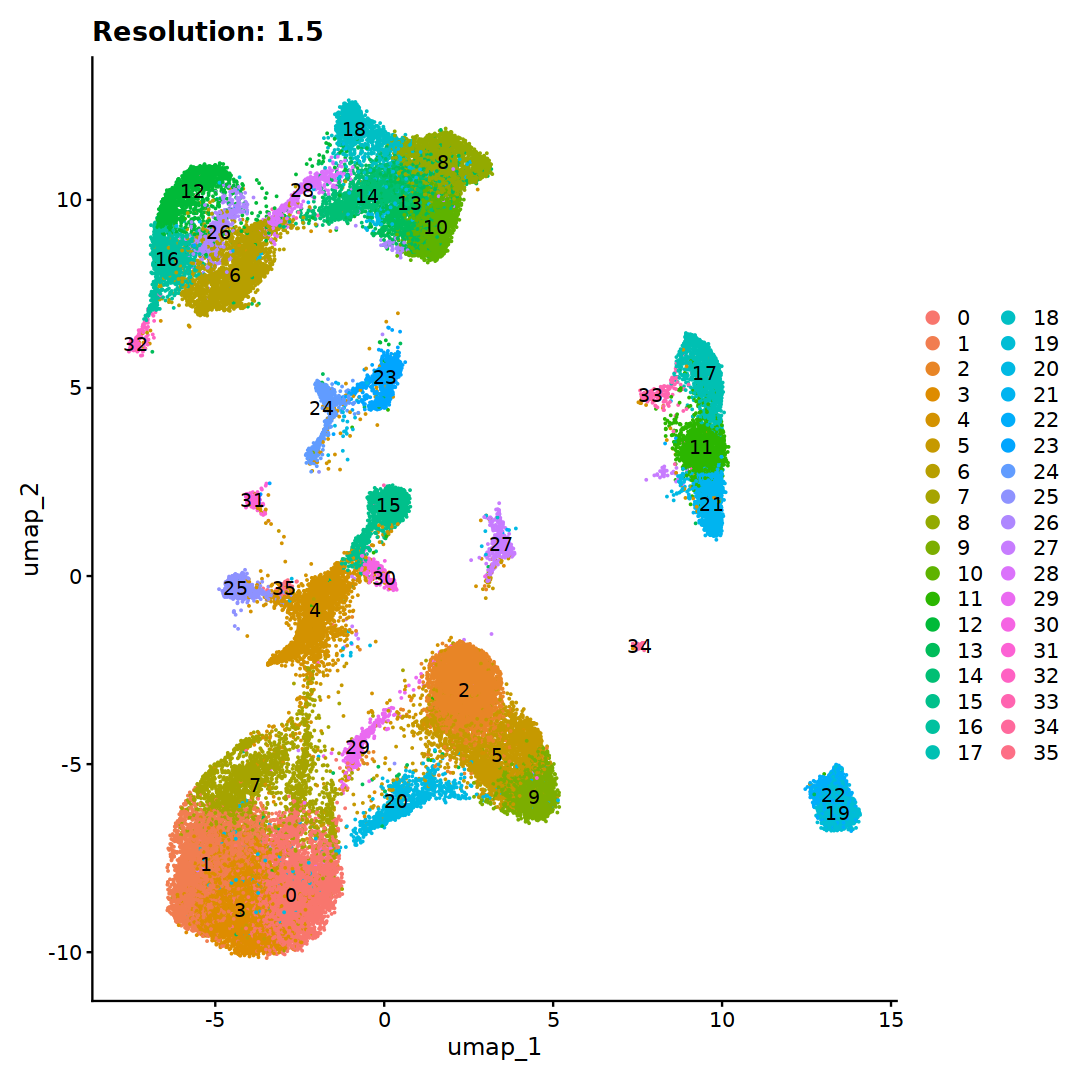

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8429
Number of communities: 47
Elapsed time: 30 seconds


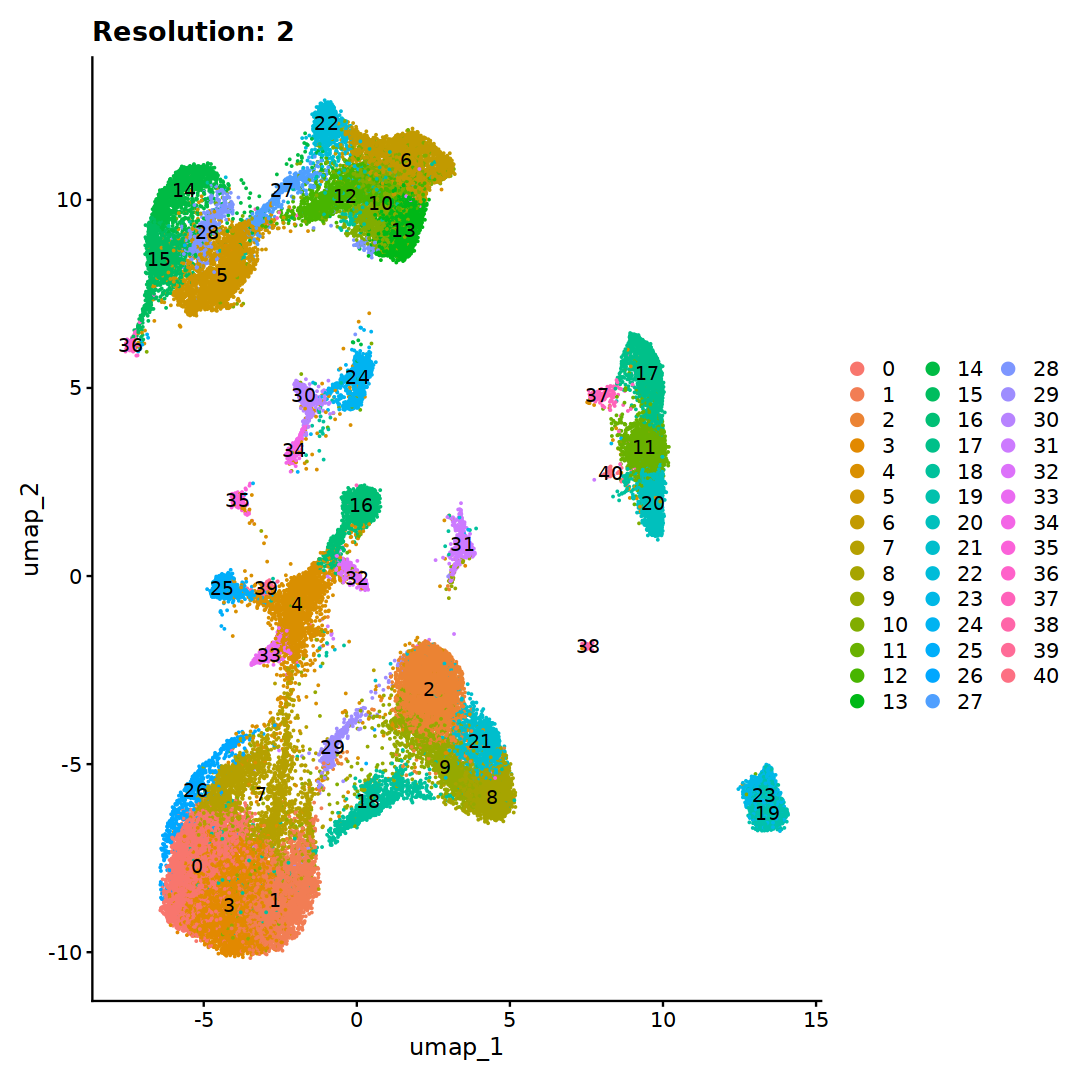

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8291
Number of communities: 48
Elapsed time: 31 seconds


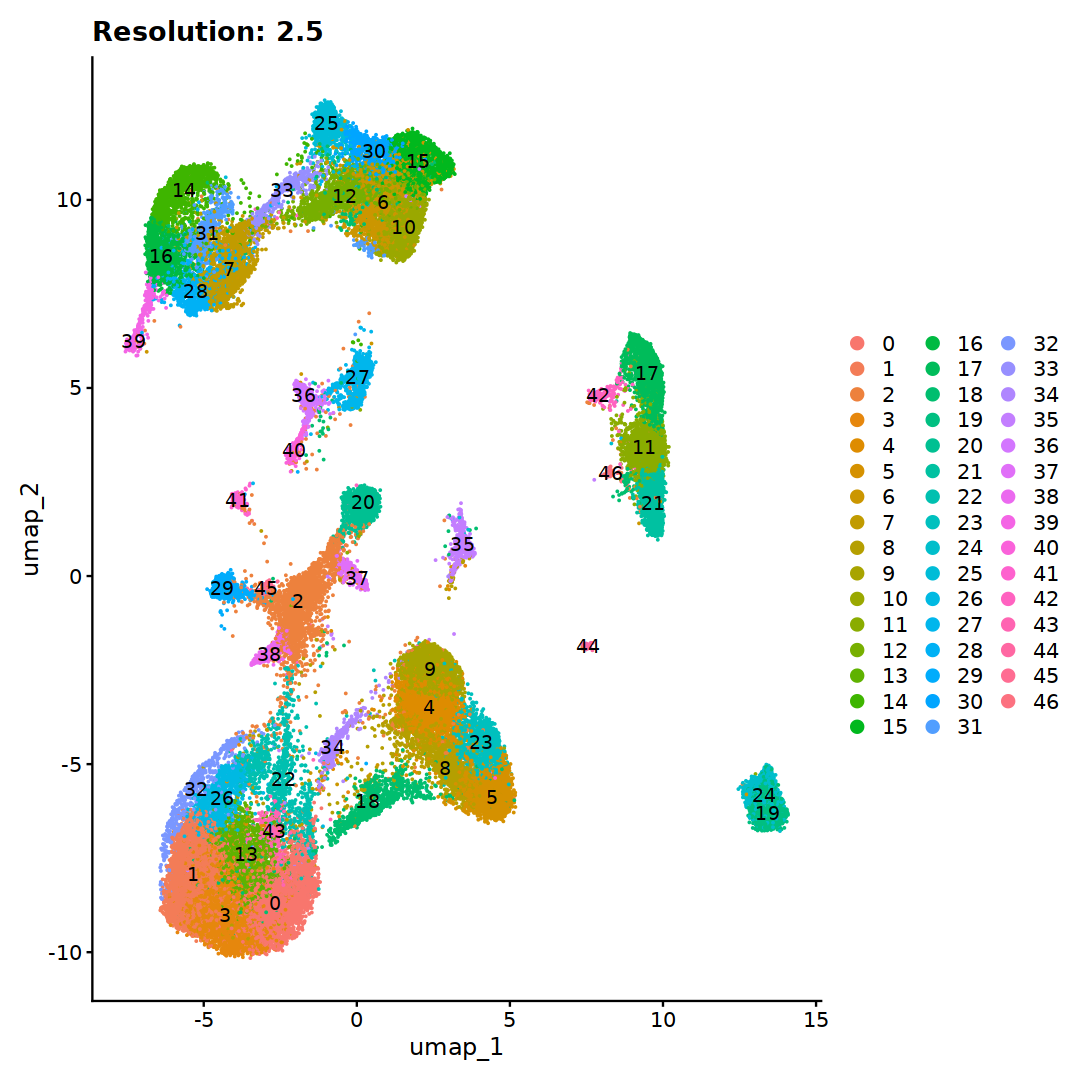

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8153
Number of communities: 50
Elapsed time: 28 seconds


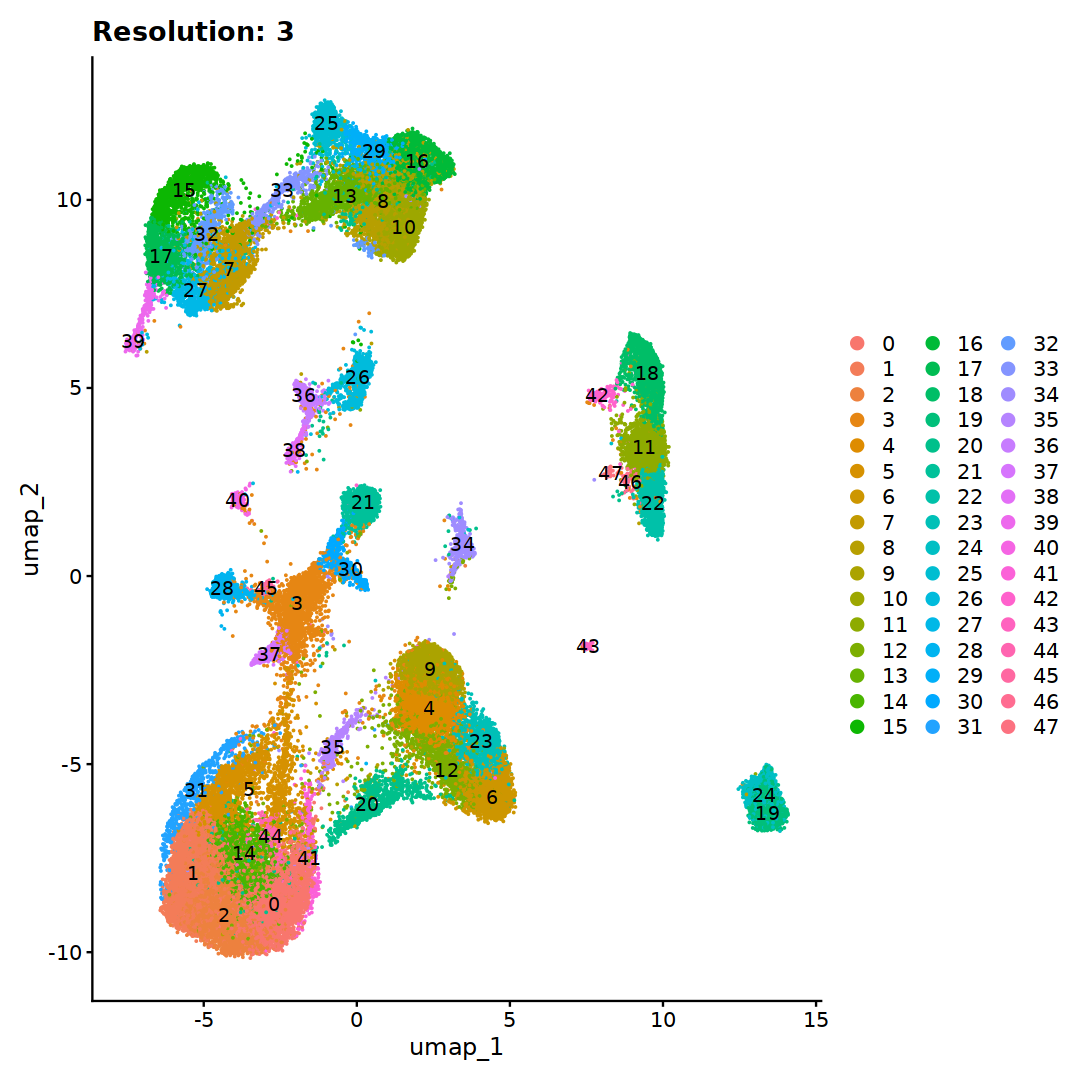

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8025
Number of communities: 52
Elapsed time: 30 seconds


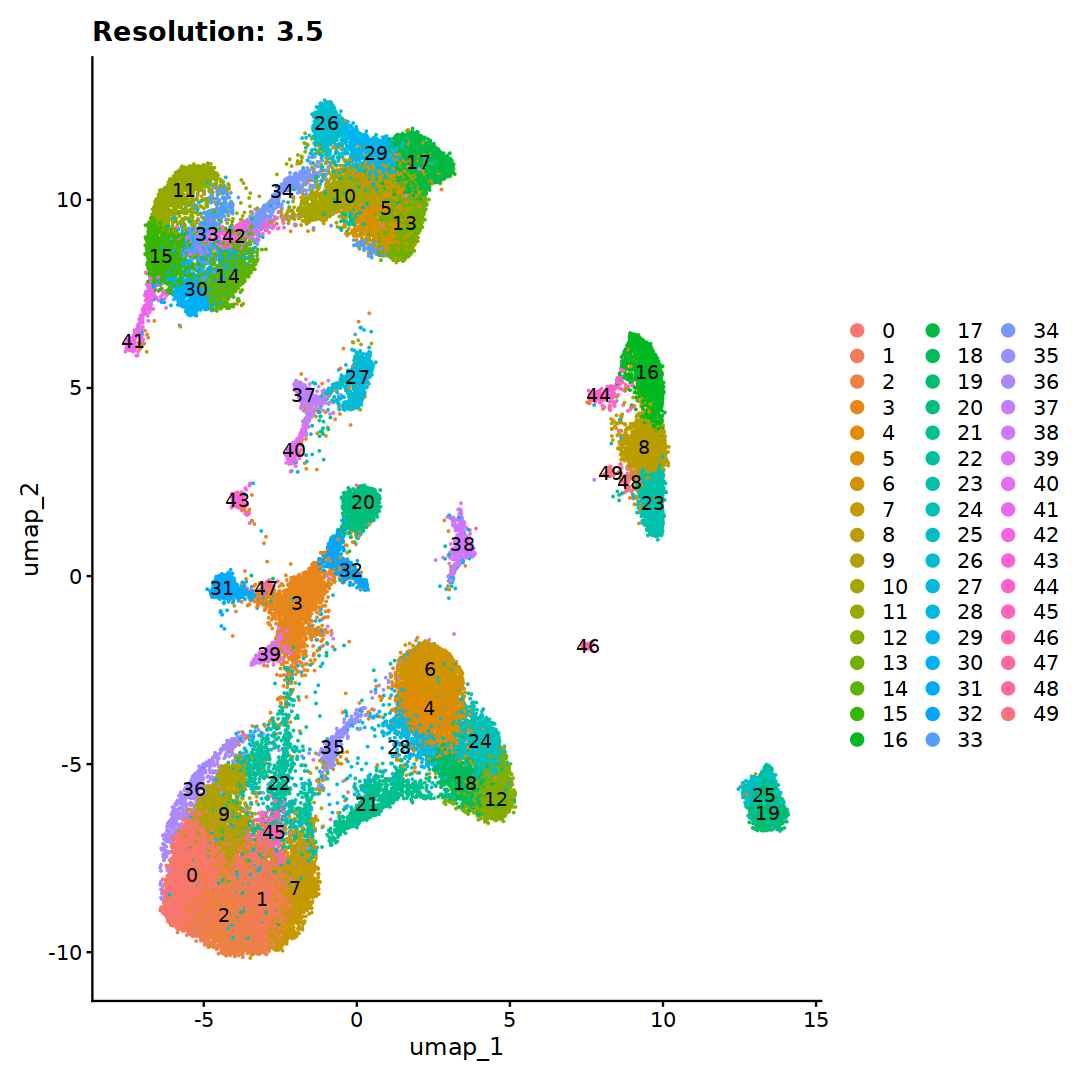

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7796
Number of communities: 60
Elapsed time: 30 seconds


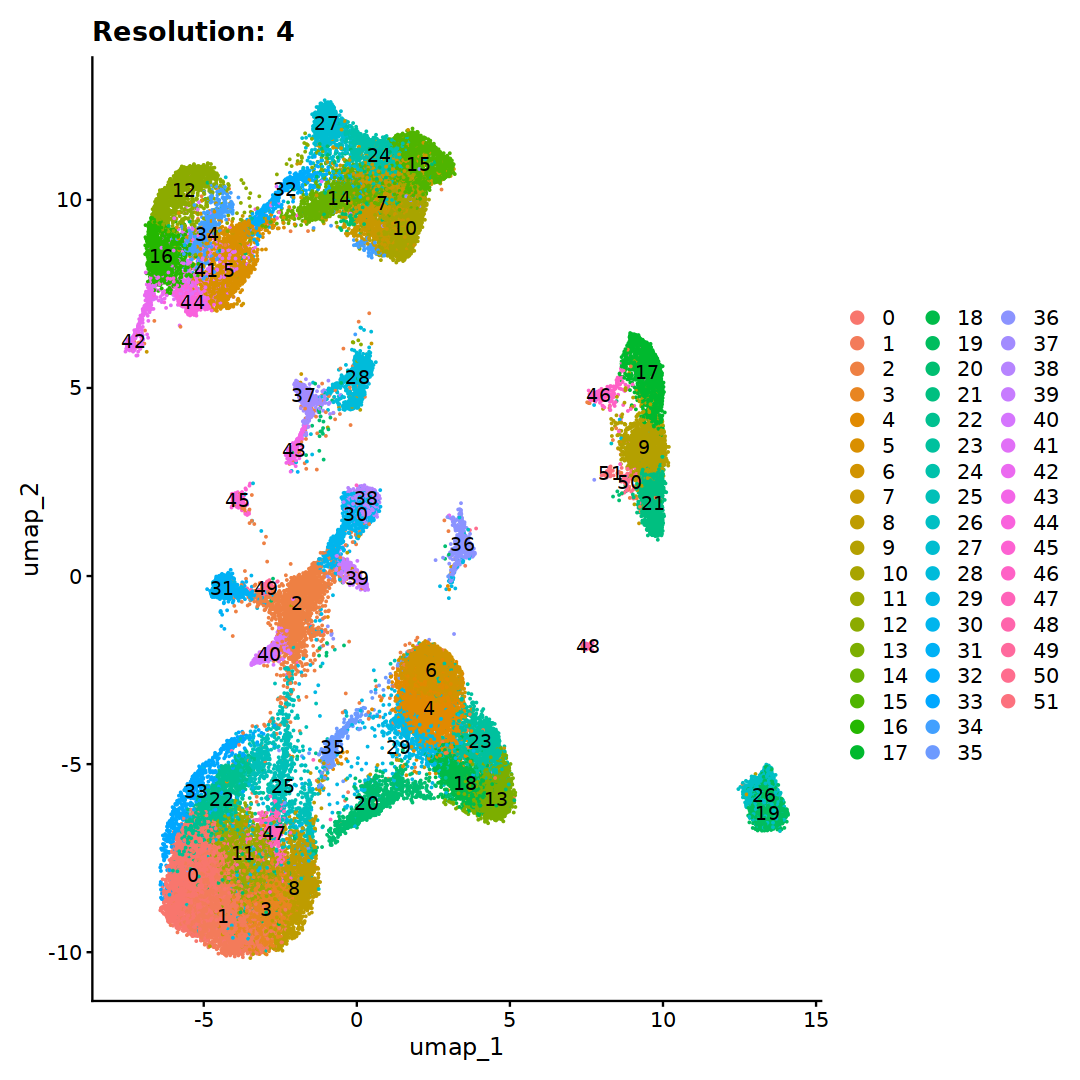

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7601
Number of communities: 68
Elapsed time: 30 seconds


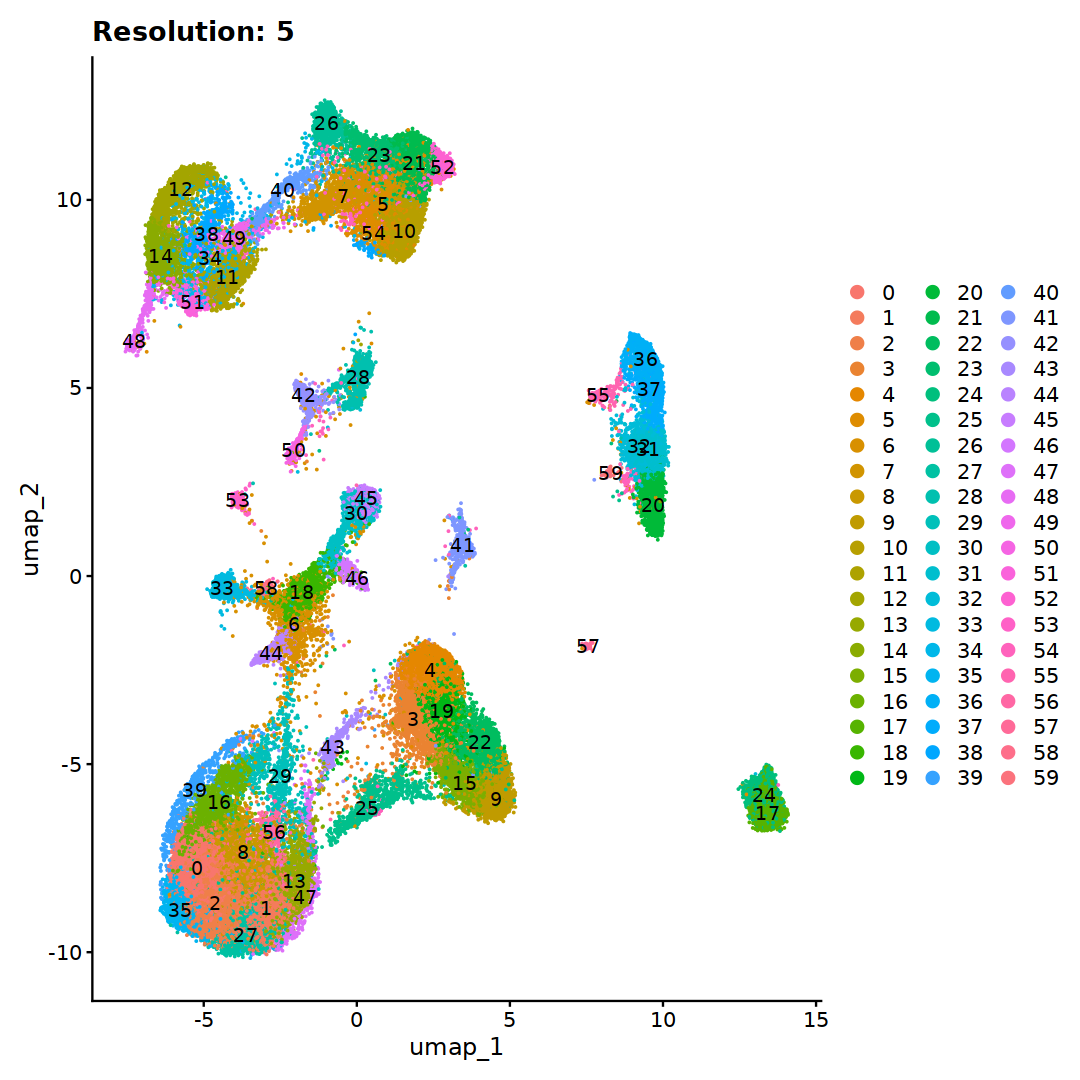

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7425
Number of communities: 79
Elapsed time: 29 seconds


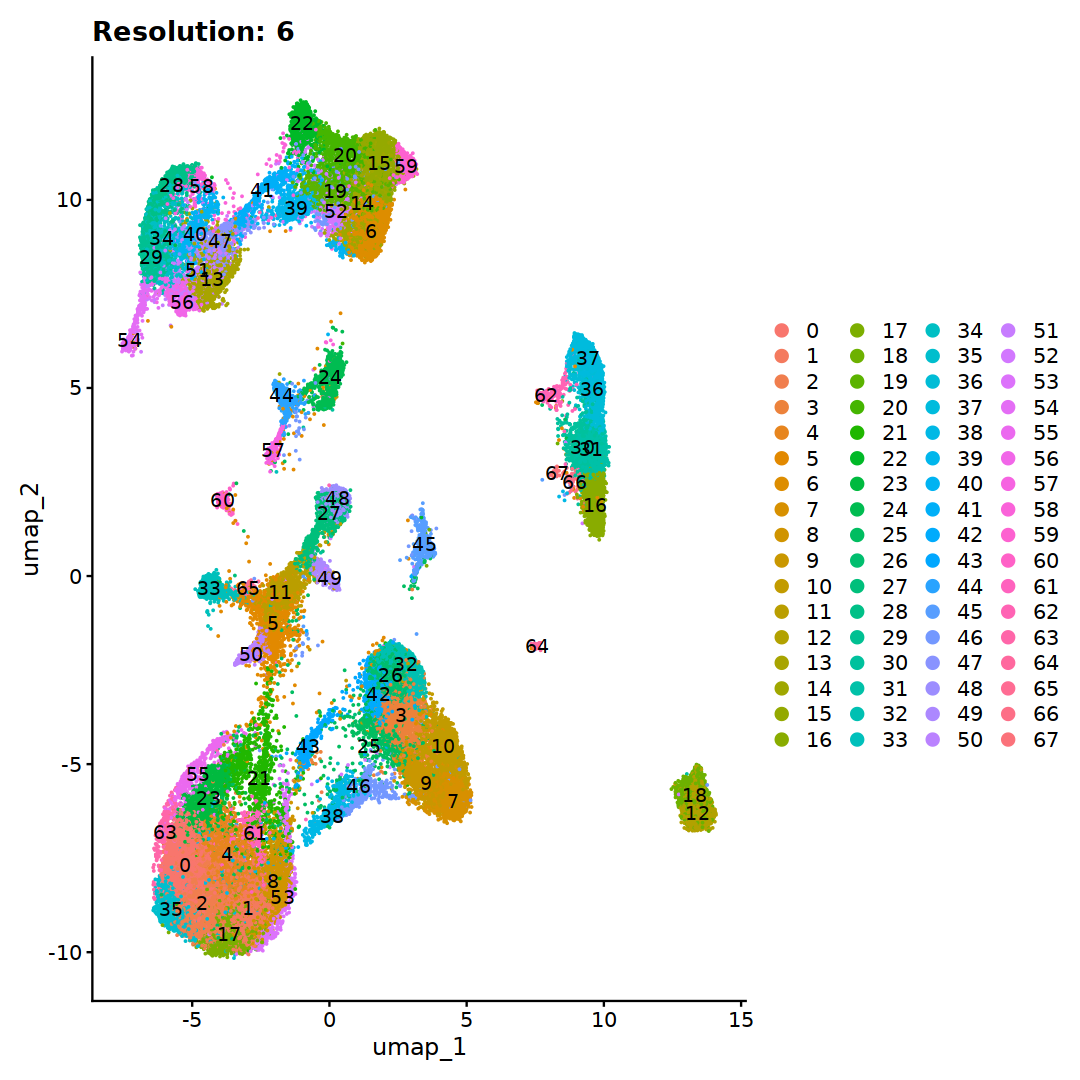

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 56454
Number of edges: 2825247

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7271
Number of communities: 84
Elapsed time: 29 seconds


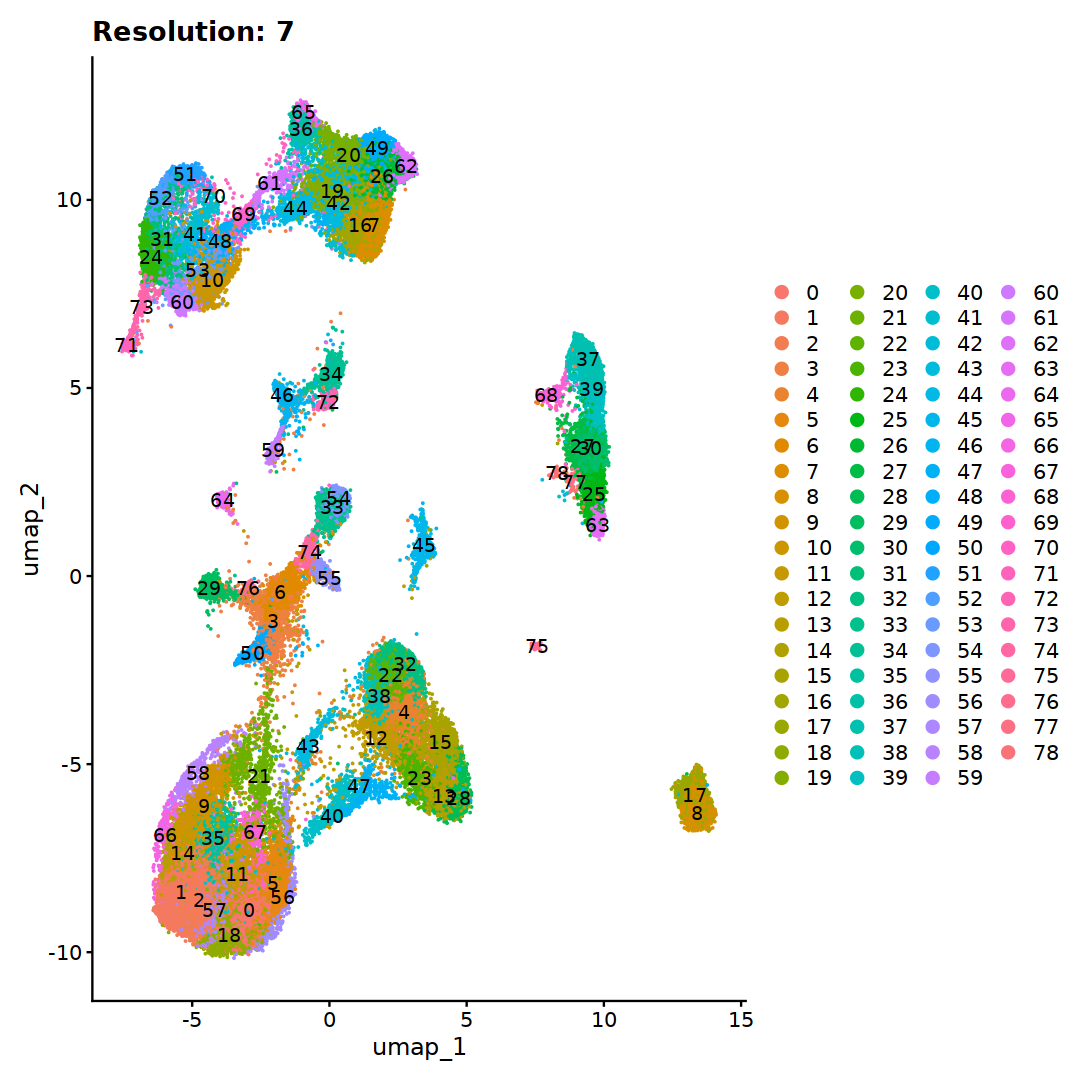

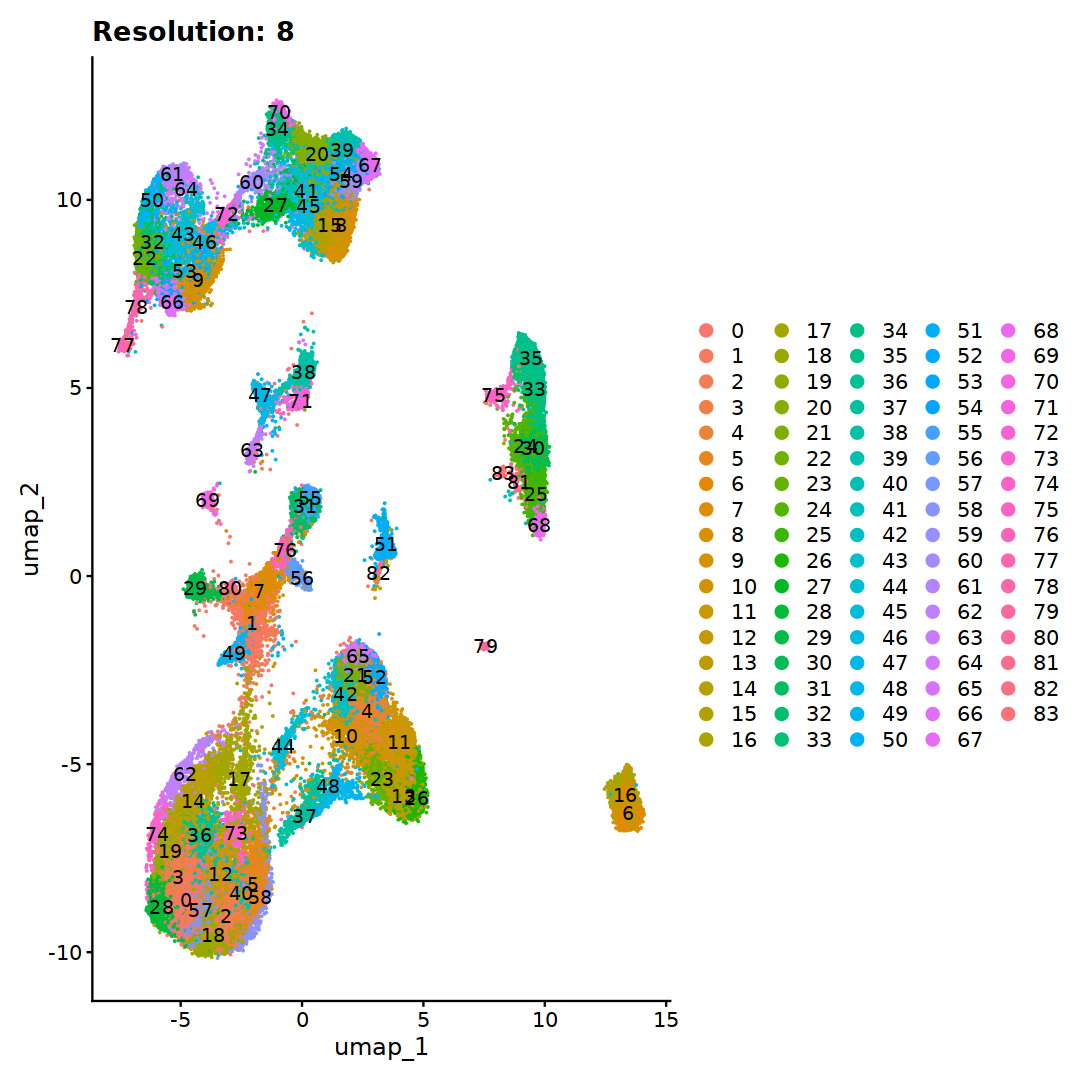

In [14]:
library(Seurat)
library(clustree)
library(dplyr)

Tel_GABA <- RunUMAP(Tel_GABA, dims = 1:40, verbose = TRUE)

cluster_results <- list()

for (i in c(0.5,1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6,  7,  8)) {
 
  Tel_GABA <- FindClusters(Tel_GABA, resolution = i)
  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("GABA_", res_col_name)
  colnames(Tel_GABA@meta.data)[colnames(Tel_GABA@meta.data) == res_col_name] <- new_col_name
  cluster_results[[paste0("resolution_", i)]] <- Tel_GABA
  plot <- DimPlot(Tel_GABA, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [15]:
saveRDS(Tel_GABA, file = '/data/work/5month_Tel/10_budgerigar_brain_5months_Tel_GABA_unannotated.rds')